> This notebook compares the results obtained with the proposed method and RANSAC

## Python Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error

In [2]:
plt.rcParams['figure.dpi'] = 150
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif"
})
plt.rcParams['font.size'] = '18'

## Load data

In [3]:
ransac = pd.read_csv('../ransac/2022-09-06-12-55-08/front-right.csv')

In [4]:
ours = pd.read_csv('../processed/2022-09-06-12-55-08/front-right.csv')

## Computing RMSE

In [5]:
idx = np.isnan(ransac.speed.to_numpy())

In [6]:
mean_squared_error(ransac.ref_speed.to_numpy()[~idx], ransac.speed.to_numpy()[~idx], squared=False)

5.618468188728747

In [7]:
mean_squared_error(ours.ref_speed.to_numpy(), ours.speed.to_numpy(), squared=False)

0.7737942742864564

## Plotting results

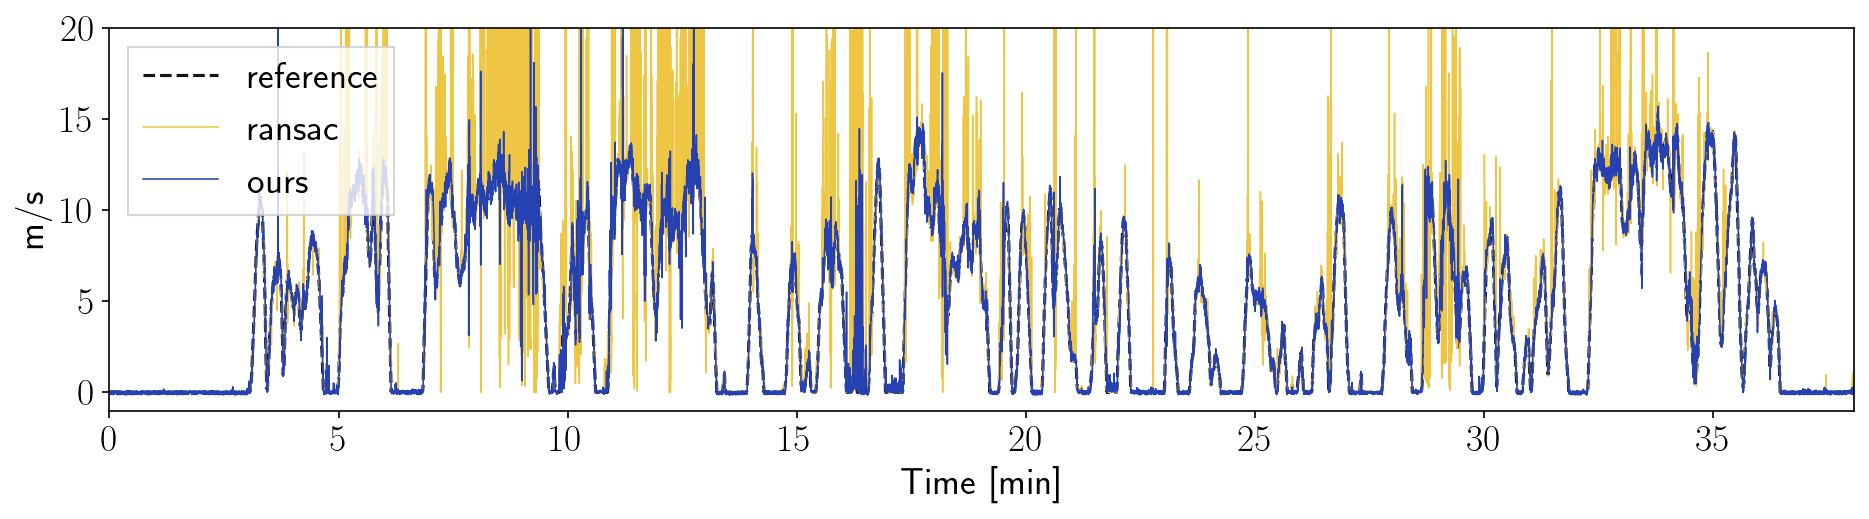

In [8]:
fig, ax = plt.subplots(figsize=[12.8, 3.8])
ax.plot((ours.Time.to_numpy()-ours.Time.iat[0])/60, ours.ref_speed.to_numpy(), '--', color='#141414', label='reference')
ax.plot((ransac.Time.to_numpy()[~idx]-ours.Time.iat[0])/60, ransac.speed.to_numpy()[~idx], '#EEC643', linewidth=0.75, alpha=1, label='ransac')
ax.plot((ours.Time.to_numpy()-ours.Time.iat[0])/60, ours.speed.to_numpy(), '#2541B2', linewidth=0.75, label='ours')
ax.set_xlabel('Time [min]')
ax.set_ylabel('m/s')
ax.legend(loc='upper left', fancybox=False)
ax.set_xlim([0, np.max(ours.Time.to_numpy()-ours.Time.iat[0])/60])
ax.set_ylim([-1, 20])
plt.tight_layout()
plt.show()

In [9]:
fig.savefig('../images/2022-09-06-12-55-08/front-right.png', dpi=300)